In [69]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [70]:
df = pd.read_csv("C:/Users/PC-PHONE/Documents/python/kaggle-Competition/train.csv")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              2029 non-null   int64 
 1   body                2029 non-null   object
 2   rule                2029 non-null   object
 3   subreddit           2029 non-null   object
 4   positive_example_1  2029 non-null   object
 5   positive_example_2  2029 non-null   object
 6   negative_example_1  2029 non-null   object
 7   negative_example_2  2029 non-null   object
 8   rule_violation      2029 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 142.8+ KB


In [72]:
#Checks for missing values in each column
df.isnull().sum()

row_id                0
body                  0
rule                  0
subreddit             0
positive_example_1    0
positive_example_2    0
negative_example_1    0
negative_example_2    0
rule_violation        0
dtype: int64

In [73]:
df.head(3)

,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation
0,0,Banks don't want you to know this! Click here ...,"No Advertising: Spam, referral links, unsolici...",Futurology,If you could tell your younger self something ...,hunt for lady for jack off in neighbourhood ht...,Watch Golden Globe Awards 2017 Live Online in ...,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\n\nDOWNLOAD/...",0
1,1,SD Stream [ ENG Link 1] (http://www.sportsstre...,"No Advertising: Spam, referral links, unsolici...",soccerstreams,[I wanna kiss you all over! Stunning!](http://...,LOLGA.COM is One of the First Professional Onl...,#Rapper \n🚨Straight Outta Cross Keys SC 🚨YouTu...,[15 Amazing Hidden Features Of Google Search Y...,0
2,2,Lol. Try appealing the ban and say you won't d...,No legal advice: Do not offer or request legal...,pcmasterrace,Don't break up with him or call the cops. If ...,It'll be dismissed: https://en.wikipedia.org/w...,Where is there a site that still works where y...,Because this statement of his is true. It isn'...,1



**check if the dataset is balanced or not: Checking balance tells you whether you can trust accuracy,and whether you need special handling of minority classes to build a useful moderation model.**


rule_violation
1    1031
0     998
Name: count, dtype: int64
rule_violation
1    50.813208
0    49.186792
Name: proportion, dtype: float64


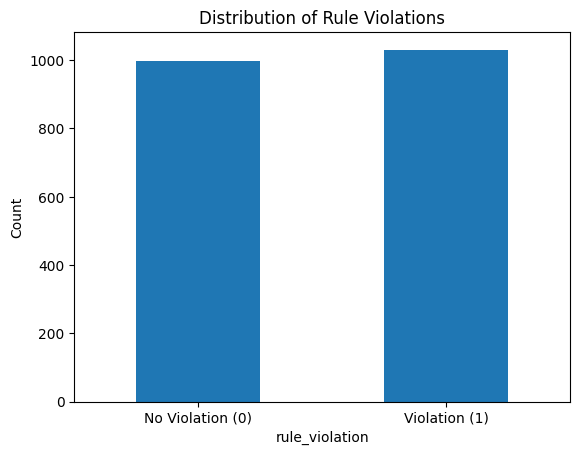

In [74]:
print(df['rule_violation'].value_counts())
print(df['rule_violation'].value_counts(normalize=True) * 100)  # pourcentage to get percentage use normalize=True

df['rule_violation'].value_counts().sort_index().plot(kind='bar') # bar plot sort_index is used to sort x axis 0 then 1 
plt.xticks([0, 1], ['No Violation (0)', 'Violation (1)'], rotation=0)
plt.ylabel("Count")
plt.title("Distribution of Rule Violations")
plt.show()

**EDA (Exploratory Data Analysis)**

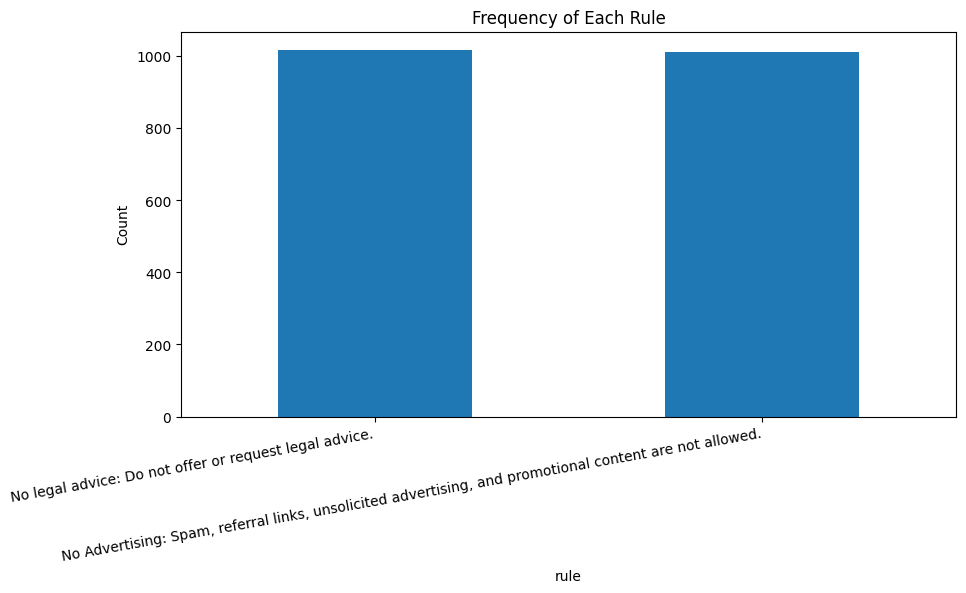

rule
No legal advice: Do not offer or request legal advice.                                                     1017
No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.    1012
Name: count, dtype: int64
rule
No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.    0.432806
No legal advice: Do not offer or request legal advice.                                                     0.583088
Name: rule_violation, dtype: float64


In [75]:
rule_counts = df['rule'].value_counts() # Count frequency of each rule
plt.figure(figsize=(10,5))
rule_counts.plot(kind='bar') # Bar plot of rule frequencies
plt.xticks(rotation=10, ha='right')
plt.title("Frequency of Each Rule")
plt.ylabel("Count")
plt.show()

print(rule_counts)

rule_violation_rate = df.groupby('rule')['rule_violation'].mean().sort_values(ascending=True) # Mean violation rate per rule there are 2rules
print(rule_violation_rate)


100


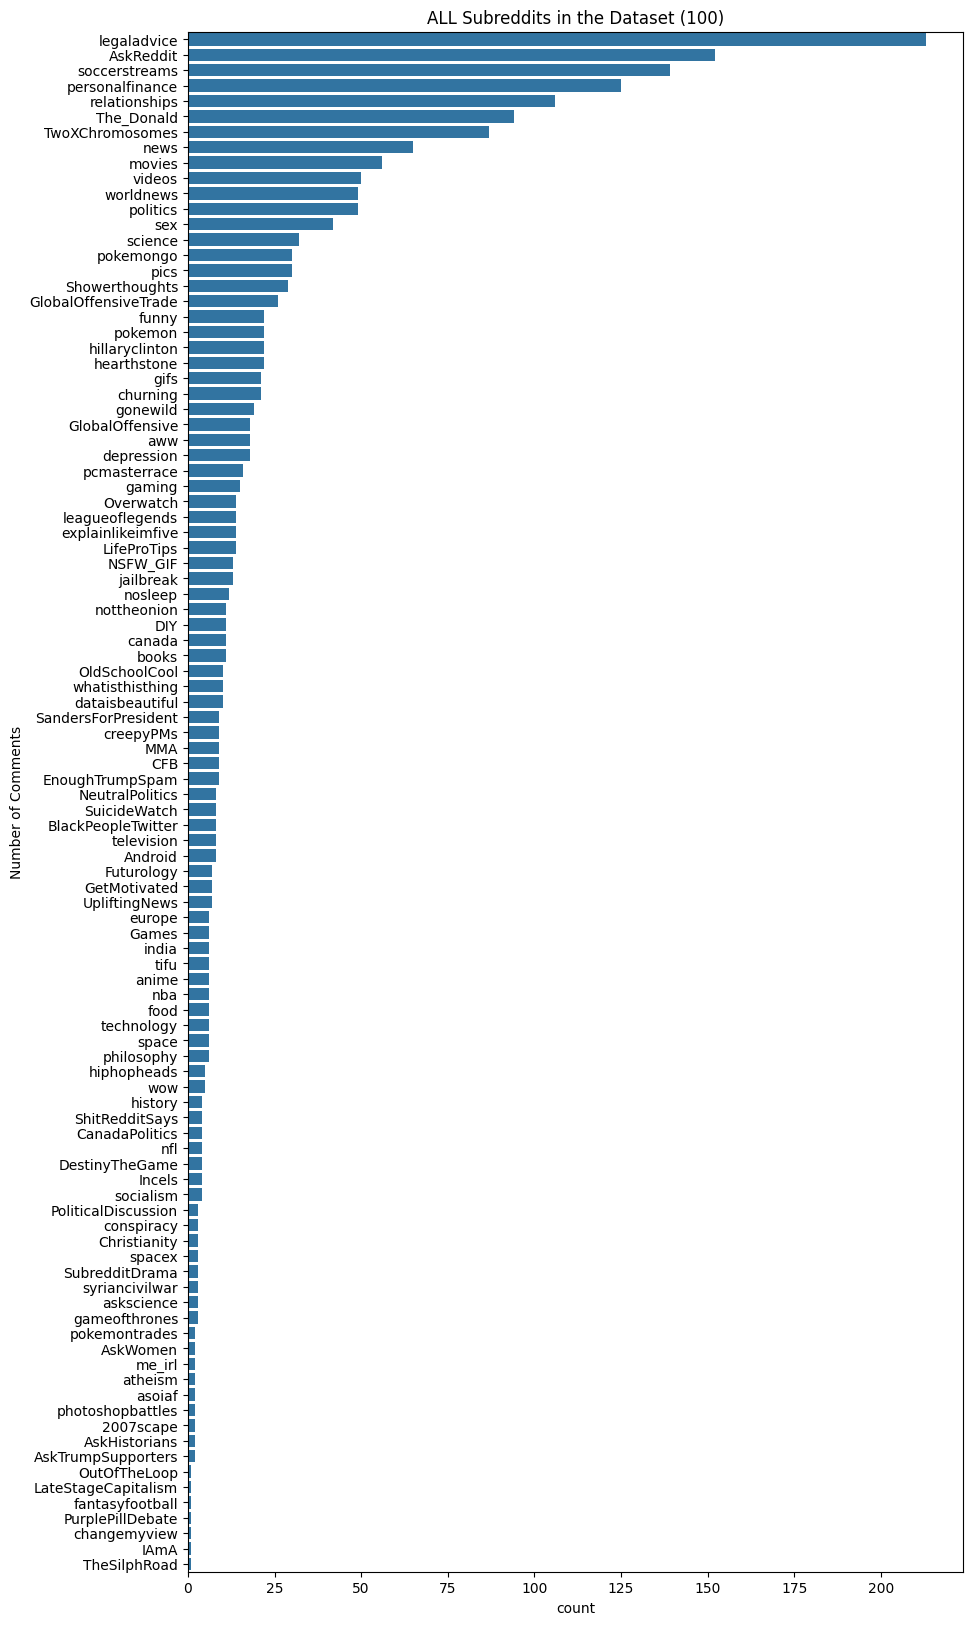

Index(['legaladvice', 'AskReddit', 'soccerstreams', 'personalfinance',
       'relationships', 'The_Donald', 'TwoXChromosomes', 'news', 'movies',
       'videos', 'worldnews', 'politics', 'sex', 'science', 'pokemongo',
       'pics', 'Showerthoughts', 'GlobalOffensiveTrade', 'funny', 'pokemon',
       'hillaryclinton', 'hearthstone', 'gifs', 'churning', 'gonewild',
       'GlobalOffensive', 'aww', 'depression', 'pcmasterrace', 'gaming',
       'Overwatch', 'leagueoflegends', 'explainlikeimfive', 'LifeProTips',
       'NSFW_GIF', 'jailbreak', 'nosleep', 'nottheonion', 'DIY', 'canada',
       'books', 'OldSchoolCool', 'whatisthisthing', 'dataisbeautiful',
       'SandersForPresident', 'creepyPMs', 'MMA', 'CFB', 'EnoughTrumpSpam',
       'NeutralPolitics', 'SuicideWatch', 'BlackPeopleTwitter', 'television',
       'Android', 'Futurology', 'GetMotivated', 'UpliftingNews', 'europe',
       'Games', 'india', 'tifu', 'anime', 'nba', 'food', 'technology', 'space',
       'philosophy', 'hiphoph

In [76]:
subs = df['subreddit'].value_counts()
print(len(subs))
subs = df['subreddit'].value_counts().index
plt.figure(figsize=(10,20))

sns.countplot(y='subreddit', data=df[df['subreddit'].isin(subs)],
              order=subs)
plt.title(f"ALL Subreddits in the Dataset ({len(subs)})")
plt.ylabel("Number of Comments")
plt.show()
print(subs)

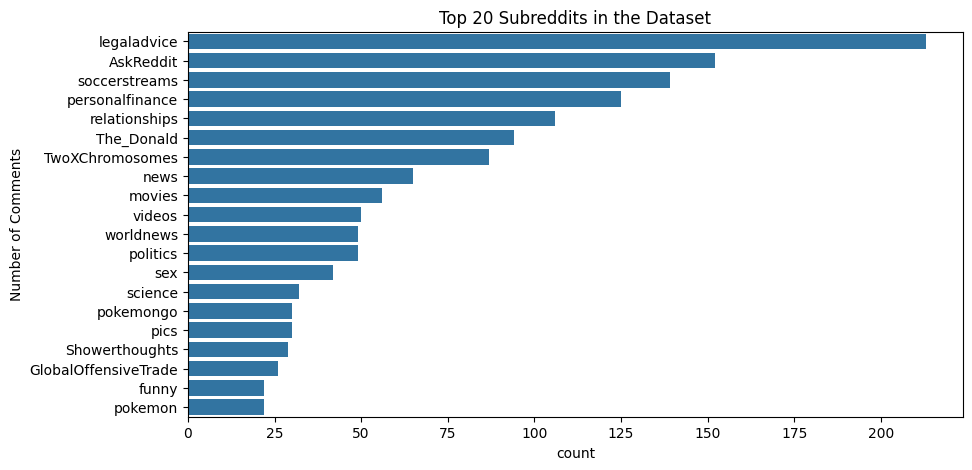

Index(['legaladvice', 'AskReddit', 'soccerstreams', 'personalfinance',
       'relationships', 'The_Donald', 'TwoXChromosomes', 'news', 'movies',
       'videos', 'worldnews', 'politics', 'sex', 'science', 'pokemongo',
       'pics', 'Showerthoughts', 'GlobalOffensiveTrade', 'funny', 'pokemon'],
      dtype='object', name='subreddit')


In [77]:
top_subs = df['subreddit'].value_counts().head(20)
top_subs = df['subreddit'].value_counts().nlargest(20).index # .nlargest is another way to get top n values and .index to get their names
plt.figure(figsize=(10,5))
#top_subs.plot(kind='bar')
sns.countplot(y='subreddit', # horizontal bar plot
              data=df[df['subreddit'].isin(top_subs)], # filter data to include only top subreddits
              order=top_subs) 
plt.title("Top 20 Subreddits in the Dataset")
plt.ylabel("Number of Comments")
plt.show()
print(top_subs)

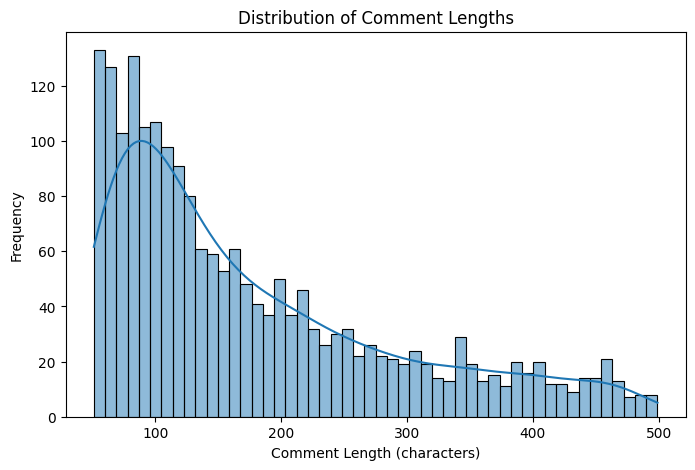


 Average comment length: 176.84277969443076
Median comment length: 138.0
Max comment length: 499
Min comment length: 51


In [78]:
df['body_length'] = df['body'].apply(lambda x: len(str(x))) # Calculate length of each comment
plt.figure(figsize=(8,5))
sns.histplot(df['body_length'], bins=50, kde=True)  # kde is used to draw a smooth curve over the histogram
plt.title("Distribution of Comment Lengths")
plt.xlabel("Comment Length (characters)")
plt.ylabel("Frequency")
plt.show()


print("\n Average comment length:", df['body_length'].mean())
print("Median comment length:", df['body_length'].median()) #the middle number in a sorted list of numbers 
print("Max comment length:", df['body_length'].max())
print("Min comment length:", df['body_length'].min())


# Box plot to compare comment lengths for violation vs no violation
The box: 	Contains the middle 50% of data (between 25th and 75th percentiles)
The line inside the box:	Median comment length 
The “whiskers”:      Extend to show the range of most of the data
The points outside whiskers	Outliers:    unusually short or long comments

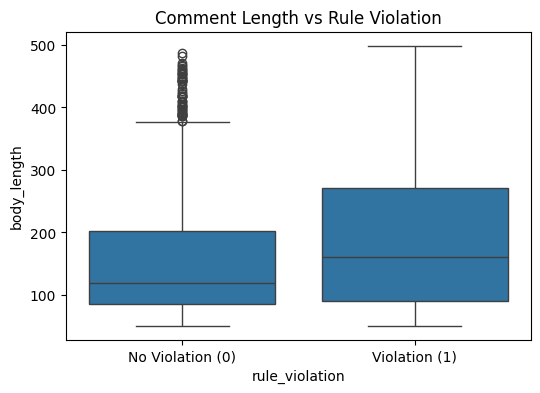

In [79]:
plt.figure(figsize=(6,4))
sns.boxplot(x='rule_violation', y='body_length', data=df)  
plt.xticks([0, 1], ['No Violation (0)', 'Violation (1)'])
plt.title("Comment Length vs Rule Violation")
plt.show()

In [80]:
print(df.groupby('rule_violation')['body_length'].describe())

                 count        mean         std   min   25%    50%    75%  \
rule_violation                                                             
0                998.0  157.588176  101.008504  51.0  85.0  119.0  202.0   
1               1031.0  195.481086  121.806840  51.0  91.0  160.0  271.0   

                  max  
rule_violation         
0               487.0  
1               499.0  


In [81]:
# Count how many comments lie outside the boxplot "whiskers" (IQR rule) per group.
def outlier_bounds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

In [82]:
outlier_counts = []  # List to store outlier counts for each rule_violation group reinitialized to empty when it called to avoid accumulation across multiple runs

for name, group in df.groupby('rule_violation'):
    lower, upper = outlier_bounds(group['body_length'])
    n_upper_outliers = (group['body_length'] > upper).sum()
    n_lower_outliers = (group['body_length'] < lower).sum()
    outlier_counts.append({
        'rule_violation': name,
        'n_upper_outliers': n_upper_outliers,
        'n_lower_outliers': n_lower_outliers,
        'upper_whisker': upper,
        'lower_whisker': lower
    })

outlier_df = pd.DataFrame(outlier_counts)
print(outlier_df)




   rule_violation  n_upper_outliers  n_lower_outliers  upper_whisker  \
0               0                59                 0          377.5   
1               1                 0                 0          541.0   

   lower_whisker  
0          -90.5  
1         -179.0  


In [83]:
duplicate_count = df.duplicated(subset=['body']).sum()
print(f"\nDuplicated comment bodies: {duplicate_count}")


Duplicated comment bodies: 160



Average words per comment: 27.96304


C:\Users\PC-PHONE\AppData\Local\Temp\ipykernel_21512\1958174288.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rule_violation', y='word_count', data=df, palette="Set2", legend=False)


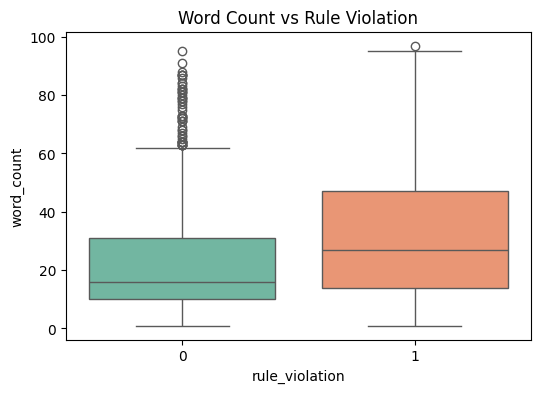

                 count       mean        std  min   25%   50%   75%   max
rule_violation                                                           
0                998.0  23.134269  18.667550  1.0  10.0  16.0  31.0  95.0
1               1031.0  32.637245  22.487026  1.0  14.0  27.0  47.0  97.0


In [84]:
df['word_count'] = df['body'].apply(lambda x: len(str(x).split()))
print("\nAverage words per comment:", df['word_count'].mean().round(5))

plt.figure(figsize=(6,4))
sns.boxplot(x='rule_violation', y='word_count', data=df, palette="Set2", legend=False)
plt.title("Word Count vs Rule Violation")
plt.show()


print(df.groupby('rule_violation')['word_count'].describe())

In [85]:
outlier_counts = []  # List to store outlier counts for each rule_violation group reinitialized to empty when it called to avoid accumulation across multiple runs

for name, group in df.groupby('rule_violation'):
    lower, upper = outlier_bounds(group['word_count'])
    n_upper_outliers = (group['word_count'] > upper).sum()
    n_lower_outliers = (group['word_count'] < lower).sum()
    outlier_counts.append({
        'rule_violation': name,
        'n_upper_outliers': n_upper_outliers,
        'n_lower_outliers': n_lower_outliers,
        'upper_whisker': upper,
        'lower_whisker': lower
    })

outlier_df = pd.DataFrame(outlier_counts)
print(outlier_df)


   rule_violation  n_upper_outliers  n_lower_outliers  upper_whisker  \
0               0                53                 0           62.5   
1               1                 1                 0           96.5   

   lower_whisker  
0          -21.5  
1          -35.5  


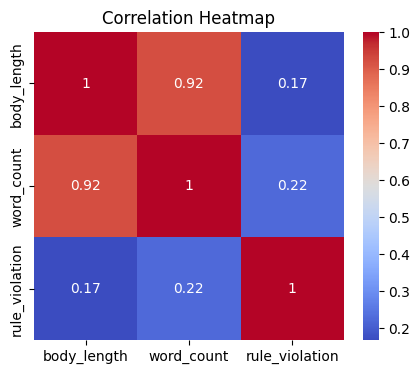

In [86]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['body_length', 'word_count', 'rule_violation']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [87]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import re

In [103]:
import string
import nltk
from nltk.corpus import stopwords
# Download stopwords from Natural Language Toolkit it has most common stopwords like the, is, in, and, to etc which do not add much meaning to text
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\PC-
[nltk_data]     PHONE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text):
    text = str(text).lower()                    # lowercase
    text = re.sub(r'http\S+|www\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)        # remove punctuation/numbers
    text = " ".join([w for w in text.split() if w not in stop_words])  # remove stopwords
    return text

df['clean_body'] = df['body'].apply(clean_text)


It provides a convenient way to tally the occurrences of elements without needing to manually implement counting logic using loops and dictionaries.
 my_list = ['apple', 'banana', 'apple', 'orange', 'banana', 'apple']
        fruit_counts = Counter(my_list)
        print(fruit_counts)
        # Output: Counter({'apple': 3, 'banana': 2, 'orange': 1})


Counter returns a  dictionary  ; functions like most_common or element returns a list

In [117]:
violation_texts = " ".join(df[df['rule_violation'] == 1]['clean_body'])
non_violation_texts = " ".join(df[df['rule_violation'] == 0]['clean_body'])

# Count word frequencies
violation_words = Counter(violation_texts.split()).most_common(20) 
non_violation_words = Counter(non_violation_texts.split()).most_common(20)

print("Top words in violations:\n", violation_words)
print("\nTop words in non-violations:\n", non_violation_words)

Top words in violations:
 [('get', 205), ('dont', 136), ('free', 108), ('would', 104), ('im', 86), ('legal', 84), ('like', 81), ('go', 77), ('sex', 76), ('could', 73), ('one', 69), ('want', 68), ('law', 65), ('youre', 63), ('know', 62), ('even', 59), ('people', 59), ('police', 58), ('illegal', 58), ('need', 58)]

Top words in non-violations:
 [('stream', 166), ('hd', 144), ('get', 80), ('sd', 79), ('mobile', 79), ('english', 79), ('would', 76), ('watch', 73), ('like', 67), ('check', 60), ('dont', 59), ('yes', 59), ('want', 53), ('free', 49), ('one', 49), ('thats', 48), ('people', 46), ('go', 46), ('make', 46), ('know', 43)]


C:\Users\PC-PHONE\AppData\Local\Temp\ipykernel_21512\1310840961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in violation_words], y=[word for word, count in violation_words], palette='Reds_r')
C:\Users\PC-PHONE\AppData\Local\Temp\ipykernel_21512\1310840961.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in non_violation_words], y=[word for word, count in non_violation_words], palette='Blues_r')


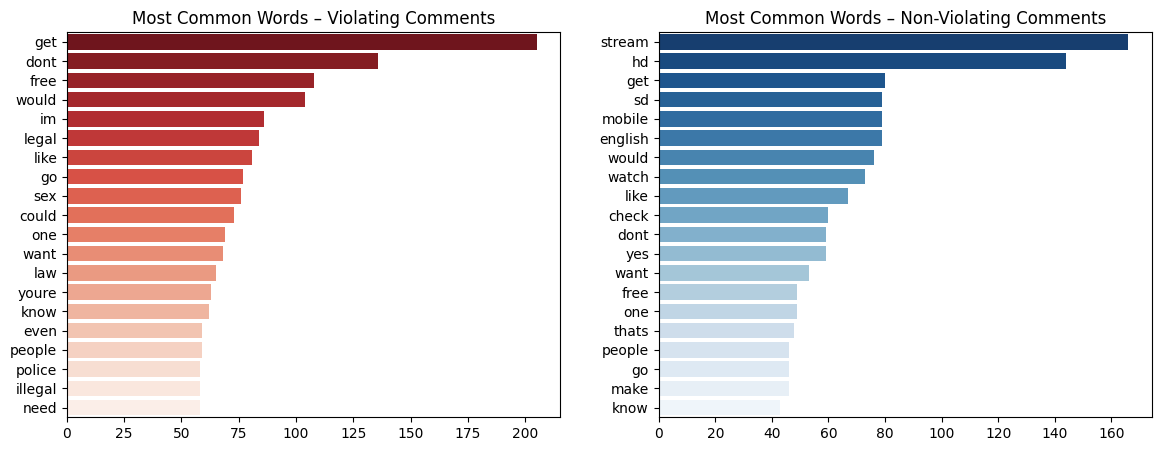

In [120]:

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(x=[count for word, count in violation_words], y=[word for word, count in violation_words], palette='Reds_r')

plt.title("Most Common Words – Violating Comments")

plt.subplot(1,2,2)
sns.barplot(x=[count for word, count in non_violation_words], y=[word for word, count in non_violation_words], palette='Blues_r')
plt.title("Most Common Words – Non-Violating Comments")
plt.show()

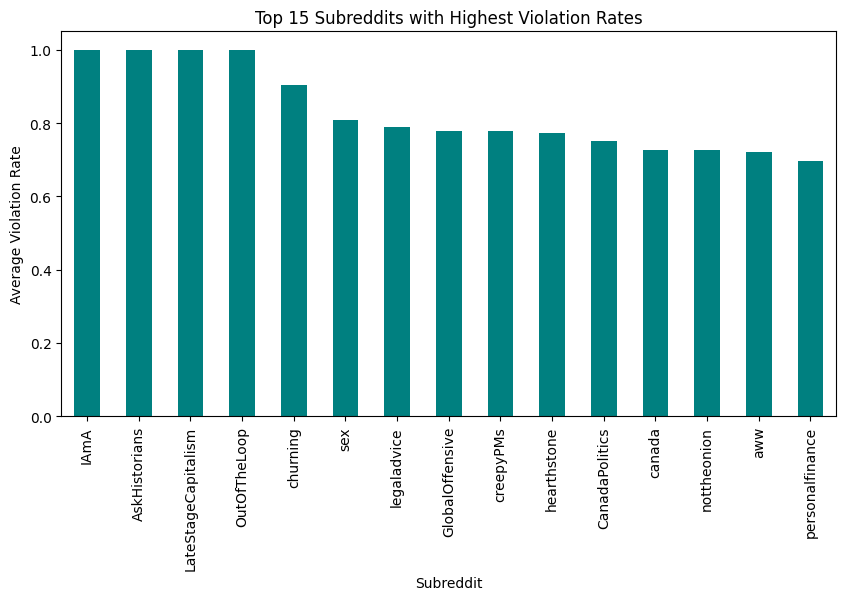


 Subreddit Summary (Top 10 by activity):
                 total_comments  violation_rate
subreddit                                      
legaladvice                 213        0.788732
AskReddit                   152        0.480263
soccerstreams               139        0.028777
personalfinance             125        0.696000
relationships               106        0.613208
The_Donald                   94        0.553191
TwoXChromosomes              87        0.459770
news                         65        0.584615
movies                       56        0.375000
videos                       50        0.400000


In [122]:
subreddit_violation = (
    df.groupby('subreddit')['rule_violation']
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10,5))
subreddit_violation.plot(kind='bar', color='teal')
plt.title("Top 15 Subreddits with Highest Violation Rates")
plt.ylabel("Average Violation Rate")
plt.xlabel("Subreddit")
plt.show()

# show count of comments per subreddit + violation % side by side
subreddit_summary = (
    df.groupby('subreddit')
      .agg(
          total_comments=('body', 'count'),
          violation_rate=('rule_violation', 'mean')
      )
      .sort_values('total_comments', ascending=False)
      .head(10)
)

print("\n Subreddit Summary (Top 10 by activity):")
print(subreddit_summary)